In [113]:
import pandas as pd

In [114]:
df = pd.read_csv('scraping-shopee.csv')
df.head()

,reviewId,userName,Rating,Review Text,Date
0,4541b2fe-7cb6-46b2-9099-ae16c21f9346,Pengguna Google,1,disuruh verifikasi terus,2025-06-17 10:30:39
1,7c6b3ee6-6114-4126-b436-3df732d83f86,Pengguna Google,5,👍,2025-06-17 10:28:19
2,5bbb09de-7fff-4c8a-a94e-5605f8d6d33a,Pengguna Google,5,murah murah banget,2025-06-17 10:26:44
3,03f9ec32-4d1f-4313-afa3-e3a91b16c873,Pengguna Google,5,joss surabaya,2025-06-17 10:26:31
4,1801bea4-c7a8-4000-8347-f382c84b00bb,Pengguna Google,5,bermanfaat;),2025-06-17 10:26:06


In [115]:
data = pd.DataFrame(df[['Date', 'userName', 'Rating', 'Review Text']])
data.tail()

,Date,userName,Rating,Review Text
15995,2025-06-07 02:49:31,Pengguna Google,5,mamtabz
15996,2025-06-07 02:34:44,Pengguna Google,5,mantap
15997,2025-06-07 02:32:33,Pengguna Google,4,shopee memang oke
15998,2025-06-07 02:31:27,Pengguna Google,5,nyaman berbelanja dishopee yang banyak promo d...
15999,2025-06-07 02:25:46,Pengguna Google,5,baik


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         16000 non-null  object
 1   userName     16000 non-null  object
 2   Rating       16000 non-null  int64 
 3   Review Text  16000 non-null  object
dtypes: int64(1), object(3)
memory usage: 500.1+ KB


In [117]:
#menangani data duplikat

data.drop_duplicates(subset=['Review Text'], inplace=True, keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11793 entries, 0 to 15998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         11793 non-null  object
 1   userName     11793 non-null  object
 2   Rating       11793 non-null  int64 
 3   Review Text  11793 non-null  object
dtypes: int64(1), object(3)
memory usage: 460.7+ KB


In [118]:
#data kosong
data.isnull().sum()

Date           0
userName       0
Rating         0
Review Text    0
dtype: int64

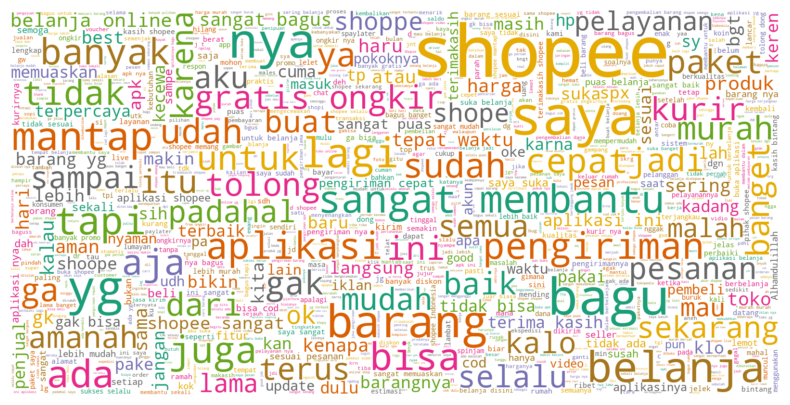

In [119]:
#membuat wordcloud
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai yang NaN dengan string kosong
data['Review Text'] = data['Review Text'].fillna("")

#menggabungkan teks dari kolom  'konten' menjadi satu bagian teks
text = " ".join(data['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','...','amp','yang','dan','di','dengan','ke'])

Wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2", max_font_size=150, random_state=42, max_words=1000, width=1600, height=800)
Wc.generate(text)

plt.figure(figsize=[10,5])
plt.imshow(Wc, interpolation='bilinear')
plt.axis('off')
plt.show()

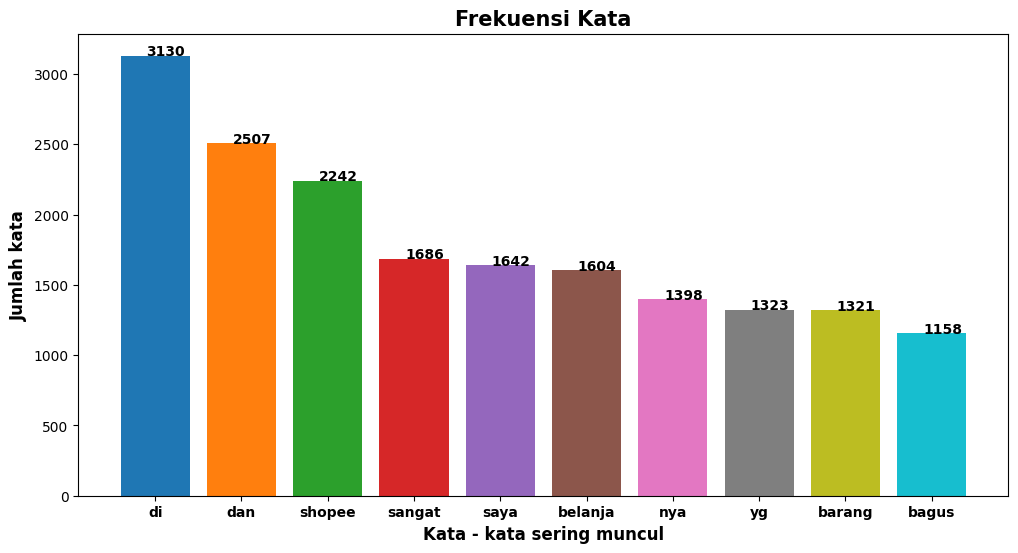

In [120]:
from collections import Counter

text = " ".join(data['Review Text'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words) 

#palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata - kata sering muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=15, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.5, num, fontsize=10, fontweight='bold', color='black')

plt.show()

### CLEANING TEXT

In [121]:
import re
import pandas as pd

# Definisi ulang fungsi preprocessing teks

def bersihkan_url(teks):
    """Menghapus URL dari teks."""
    if isinstance(teks, str):
        return re.sub(r'https?://\S+|www\.\S+', '', teks)
    return teks

def hapus_tag_html(teks):
    """Menghapus tag HTML dari teks."""
    if isinstance(teks, str):
        return re.sub(r'<.*?>', '', teks)
    return teks

def hilangkan_emoji(teks):
    """Menghapus emoji dan karakter Unicode khusus dari teks."""
    if isinstance(teks, str):
        pola_emoji = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emotikon wajah
            u"\U0001F300-\U0001F5FF"  # simbol dan ikon
            u"\U0001F680-\U0001F6FF"  # transportasi dan simbol
            u"\U0001F1E0-\U0001F1FF"  # bendera
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001F926-\U0001F937"
            u"\U00010000-\U0010FFFF"
            u"\u200d\u2640-\u2642\u2600-\u2B55\u23cf\u23e9\u231a\u3030"
            u"\ufe0f\u2069\u2066\u200c\u2068\u2067"
            "]+", flags=re.UNICODE
        )
        return pola_emoji.sub('', teks)
    return teks

def bersihkan_simbol(teks):
    """Menghapus karakter non-alfanumerik (simbol) kecuali spasi."""
    if isinstance(teks, str):
        return re.sub(r'[^A-Za-z0-9 ]+', ' ', teks)
    return teks

def hilangkan_angka(teks):
    """Menghapus angka dari teks, hanya menyisakan huruf."""
    if isinstance(teks, str):
        return re.sub(r'\d+', '', teks)
    return teks

# Fungsi utama untuk membersihkan teks
def proses_teks(teks):
    teks = bersihkan_url(teks)
    teks = hapus_tag_html(teks)
    teks = hilangkan_emoji(teks)
    teks = bersihkan_simbol(teks)
    teks = hilangkan_angka(teks)
    return teks.strip()

# Contoh pemrosesan pada kolom data
data['cleaning'] = data['Review Text'].apply(proses_teks)

# Lihat hasil pembersihan
data.head()


,Date,userName,Rating,Review Text,cleaning
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus
1,2025-06-17 10:28:19,Pengguna Google,5,👍,
2,2025-06-17 10:26:44,Pengguna Google,5,murah murah banget,murah murah banget
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat


In [122]:
#data kosong
data.isnull().sum()

Date           0
userName       0
Rating         0
Review Text    0
cleaning       0
dtype: int64

In [123]:
# Proses normalisasi huruf (case folding)
def normalisasi_huruf(teks):
    """Mengubah seluruh teks menjadi huruf kecil."""
    return teks.lower() if isinstance(teks, str) else teks

# Terapkan ke kolom 'cleaning' dan simpan di kolom baru
data['case_folding'] = data['cleaning'].apply(normalisasi_huruf)

# Tampilkan data
data.head()


,Date,userName,Rating,Review Text,cleaning,case_folding
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,
2,2025-06-17 10:26:44,Pengguna Google,5,murah murah banget,murah murah banget,murah murah banget
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat


In [124]:
#menhapus indeks kedua dari dataset data
data.drop(data.index[2], inplace=True)
data.drop(data.index[10], inplace=True)
data.head()

,Date,userName,Rating,Review Text,cleaning,case_folding
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat
5,2025-06-17 10:25:08,Pengguna Google,5,Shoope dari sisi harga sangat bersaing. thx,Shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx


In [125]:
#normalisasi kata

#fungsi penggantian kata tidak baku
def replace_taboo_words(text,kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
        
        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(baku_word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = text
        kata_diganti = []
        kata_tidak_baku_hash = []
        kalimat_baku = []
        
    return replaced_text, kata_diganti, kata_tidak_baku_hash, kalimat_baku
    


In [126]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [127]:
# Terapkan proses normalisasi kata tidak baku
def normalisasi_kalimat(teks, kamus):
    """
    Mengembalikan:
    - Teks yang telah dinormalisasi
    - Daftar kata yang diganti
    - Hash dari kata tidak baku
    - Kalimat setelah penggantian
    """
    return replace_taboo_words(teks, kamus)

# Proses mapping terhadap setiap baris teks
hasil_normalisasi = data['case_folding'].apply(lambda x: normalisasi_kalimat(x, kamus_tidak_baku))

# Memisahkan hasil tuple ke dalam kolom-kolom terpisah
data[['normalisasi', 'kata_diganti', 'kata_tidak_baku_hash', 'kalimat_baku']] = pd.DataFrame(hasil_normalisasi.tolist(), index=data.index)

# Menampilkan dataframe baru yang hanya berisi kolom terpilih
kolom_ditampilkan = ['Date', 'userName', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']
df = data[kolom_ditampilkan]

# Tampilkan baris pertama
df.head(10)


,Date,userName,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,,
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya,joss surabaya
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat,bermanfaat
5,2025-06-17 10:25:08,Pengguna Google,5,Shoope dari sisi harga sangat bersaing. thx,Shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx
6,2025-06-17 10:24:49,Pengguna Google,4,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan
7,2025-06-17 10:24:23,Pengguna Google,1,Shoope memang bagus si,Shoope memang bagus si,shoope memang bagus si,shoope memang bagus sih
8,2025-06-17 10:24:07,Pengguna Google,5,belanja di Shopi harusnya teliti ada penjual y...,belanja di Shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...
9,2025-06-17 10:24:00,Pengguna Google,5,"bagus , tolong spaylater nya di ACC min",bagus tolong spaylater nya di ACC min,bagus tolong spaylater nya di acc min,bagus tolong spaylater ya di acc min
10,2025-06-17 10:23:34,Pengguna Google,5,sangat baik,sangat baik,sangat baik,sangat baik


In [128]:
#tokenisasi
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22828\887873342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenize'] = df['normalisasi'].apply(tokenize)


,Date,userName,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,"[disuruh, verifikasi, terus]"
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,,,[]
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya,joss surabaya,"[joss, surabaya]"
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat,bermanfaat,[bermanfaat]
5,2025-06-17 10:25:08,Pengguna Google,5,Shoope dari sisi harga sangat bersaing. thx,Shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,"[shoope, dari, sisi, harga, sangat, bersaing, ..."


In [129]:
#Stopword Removal
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

def stopword_removal(tokens):
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['stopword_removal'] = df['tokenize'].apply(stopword_removal)
df.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22828\1810111081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword_removal'] = df['tokenize'].apply(stopword_removal)


,Date,userName,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword_removal
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,"[disuruh, verifikasi, terus]","[disuruh, verifikasi]"
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,,,[],[]
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya,joss surabaya,"[joss, surabaya]","[joss, surabaya]"
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat,bermanfaat,[bermanfaat],[bermanfaat]
5,2025-06-17 10:25:08,Pengguna Google,5,Shoope dari sisi harga sangat bersaing. thx,Shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,"[shoope, dari, sisi, harga, sangat, bersaing, ...","[shoope, sisi, harga, bersaing, thx]"
6,2025-06-17 10:24:49,Pengguna Google,4,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,"[jangan, sampai, kecewa, pelanggan]","[kecewa, pelanggan]"
7,2025-06-17 10:24:23,Pengguna Google,1,Shoope memang bagus si,Shoope memang bagus si,shoope memang bagus si,shoope memang bagus sih,"[shoope, memang, bagus, sih]","[shoope, bagus, sih]"
8,2025-06-17 10:24:07,Pengguna Google,5,belanja di Shopi harusnya teliti ada penjual y...,belanja di Shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,"[belanja, di, shopi, harusnya, teliti, ada, pe...","[belanja, shopi, teliti, penjual, deskripsi, b..."
9,2025-06-17 10:24:00,Pengguna Google,5,"bagus , tolong spaylater nya di ACC min",bagus tolong spaylater nya di ACC min,bagus tolong spaylater nya di acc min,bagus tolong spaylater ya di acc min,"[bagus, tolong, spaylater, ya, di, acc, min]","[bagus, tolong, spaylater, ya, acc, min]"
10,2025-06-17 10:23:34,Pengguna Google,5,sangat baik,sangat baik,sangat baik,sangat baik,"[sangat, baik]",[]


In [130]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer untuk Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk preprocessing sebelum stemming
def custom_preprocessing(text):
    text = text.replace("diupdate", "update")  
    text = text.replace("fiturnya", "fitur")
    return text

def stem_text(text):
    text = [custom_preprocessing(word) for word in text]  # Terapkan preprocessing
    return [stemmer.stem(word) for word in text]  # Stemming

df['stemming'] = df['stopword_removal'].apply(lambda x: stem_text(x))
df.head(20)


,Date,userName,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword_removal,stemming
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,"[disuruh, verifikasi, terus]","[disuruh, verifikasi]","[suruh, verifikasi]"
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,,,[],[],[]
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya,joss surabaya,"[joss, surabaya]","[joss, surabaya]","[joss, surabaya]"
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat,bermanfaat,[bermanfaat],[bermanfaat],[manfaat]
5,2025-06-17 10:25:08,Pengguna Google,5,Shoope dari sisi harga sangat bersaing. thx,Shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,"[shoope, dari, sisi, harga, sangat, bersaing, ...","[shoope, sisi, harga, bersaing, thx]","[shoope, sisi, harga, saing, thx]"
6,2025-06-17 10:24:49,Pengguna Google,4,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,"[jangan, sampai, kecewa, pelanggan]","[kecewa, pelanggan]","[kecewa, langgan]"
7,2025-06-17 10:24:23,Pengguna Google,1,Shoope memang bagus si,Shoope memang bagus si,shoope memang bagus si,shoope memang bagus sih,"[shoope, memang, bagus, sih]","[shoope, bagus, sih]","[shoope, bagus, sih]"
8,2025-06-17 10:24:07,Pengguna Google,5,belanja di Shopi harusnya teliti ada penjual y...,belanja di Shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,"[belanja, di, shopi, harusnya, teliti, ada, pe...","[belanja, shopi, teliti, penjual, deskripsi, b...","[belanja, shopi, teliti, jual, deskripsi, bara..."
9,2025-06-17 10:24:00,Pengguna Google,5,"bagus , tolong spaylater nya di ACC min",bagus tolong spaylater nya di ACC min,bagus tolong spaylater nya di acc min,bagus tolong spaylater ya di acc min,"[bagus, tolong, spaylater, ya, di, acc, min]","[bagus, tolong, spaylater, ya, acc, min]","[bagus, tolong, spaylater, ya, acc, min]"
10,2025-06-17 10:23:34,Pengguna Google,5,sangat baik,sangat baik,sangat baik,sangat baik,"[sangat, baik]",[],[]


In [131]:
#menggabungkan kata token yang ada di kolom stemming kembali

def sentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence 

df['final_text'] = df['stemming'].apply(sentence)
df.head(20)

,Date,userName,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword_removal,stemming,final_text
0,2025-06-17 10:30:39,Pengguna Google,1,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,disuruh verifikasi terus,"[disuruh, verifikasi, terus]","[disuruh, verifikasi]","[suruh, verifikasi]",suruh verifikasi
1,2025-06-17 10:28:19,Pengguna Google,5,👍,,,,[],[],[],
3,2025-06-17 10:26:31,Pengguna Google,5,joss surabaya,joss surabaya,joss surabaya,joss surabaya,"[joss, surabaya]","[joss, surabaya]","[joss, surabaya]",joss surabaya
4,2025-06-17 10:26:06,Pengguna Google,5,bermanfaat;),bermanfaat,bermanfaat,bermanfaat,[bermanfaat],[bermanfaat],[manfaat],manfaat
5,2025-06-17 10:25:08,Pengguna Google,5,Shoope dari sisi harga sangat bersaing. thx,Shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,shoope dari sisi harga sangat bersaing thx,"[shoope, dari, sisi, harga, sangat, bersaing, ...","[shoope, sisi, harga, bersaing, thx]","[shoope, sisi, harga, saing, thx]",shoope sisi harga saing thx
6,2025-06-17 10:24:49,Pengguna Google,4,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,jangan sampai kecewa pelanggan,"[jangan, sampai, kecewa, pelanggan]","[kecewa, pelanggan]","[kecewa, langgan]",kecewa langgan
7,2025-06-17 10:24:23,Pengguna Google,1,Shoope memang bagus si,Shoope memang bagus si,shoope memang bagus si,shoope memang bagus sih,"[shoope, memang, bagus, sih]","[shoope, bagus, sih]","[shoope, bagus, sih]",shoope bagus sih
8,2025-06-17 10:24:07,Pengguna Google,5,belanja di Shopi harusnya teliti ada penjual y...,belanja di Shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,belanja di shopi harusnya teliti ada penjual y...,"[belanja, di, shopi, harusnya, teliti, ada, pe...","[belanja, shopi, teliti, penjual, deskripsi, b...","[belanja, shopi, teliti, jual, deskripsi, bara...",belanja shopi teliti jual deskripsi barang ses...
9,2025-06-17 10:24:00,Pengguna Google,5,"bagus , tolong spaylater nya di ACC min",bagus tolong spaylater nya di ACC min,bagus tolong spaylater nya di acc min,bagus tolong spaylater ya di acc min,"[bagus, tolong, spaylater, ya, di, acc, min]","[bagus, tolong, spaylater, ya, acc, min]","[bagus, tolong, spaylater, ya, acc, min]",bagus tolong spaylater ya acc min
10,2025-06-17 10:23:34,Pengguna Google,5,sangat baik,sangat baik,sangat baik,sangat baik,"[sangat, baik]",[],[],


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11791 entries, 0 to 15998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              11791 non-null  object
 1   userName          11791 non-null  object
 2   Rating            11791 non-null  int64 
 3   Review Text       11791 non-null  object
 4   cleaning          11791 non-null  object
 5   case_folding      11791 non-null  object
 6   normalisasi       11791 non-null  object
 7   tokenize          11791 non-null  object
 8   stopword_removal  11791 non-null  object
 9   stemming          11791 non-null  object
 10  final_text        11791 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


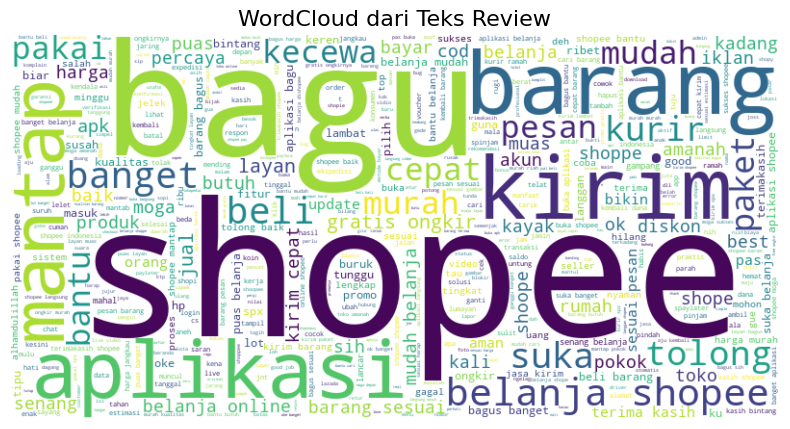

In [133]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Fungsi untuk membersihkan teks dari karakter non-alfanumerik
def bersihkan_teks(teks):
    """
    Menghapus karakter non-huruf dan non-angka dari teks.
    """
    return re.sub(r"[^\w\s]", "", teks)

# Pastikan data final_text adalah string dan tidak NaN
df['final_text'] = df['final_text'].fillna("").astype(str)

# Terapkan pembersihan regex
df['final_text'] = df['final_text'].apply(bersihkan_teks)

# Gabungkan semua teks menjadi satu string besar untuk WordCloud
teks_korpus = " ".join(df['final_text'])

# Tambahkan stopwords tambahan (bahasa Indonesia + umum)
stopword_tambahan = {'https', 'co', '...', 'amp', 'yang', 'dan', 'di', 'dengan', 'ke', 'ya', 'nya'}
stopword_total = set(STOPWORDS).union(stopword_tambahan)

# Inisialisasi dan buat WordCloud
wordcloud = WordCloud(
    stopwords=stopword_total,
    background_color='white',
    max_words=500,
    width=800,
    height=400
).generate(teks_korpus)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Teks Review", fontsize=16)
plt.show()


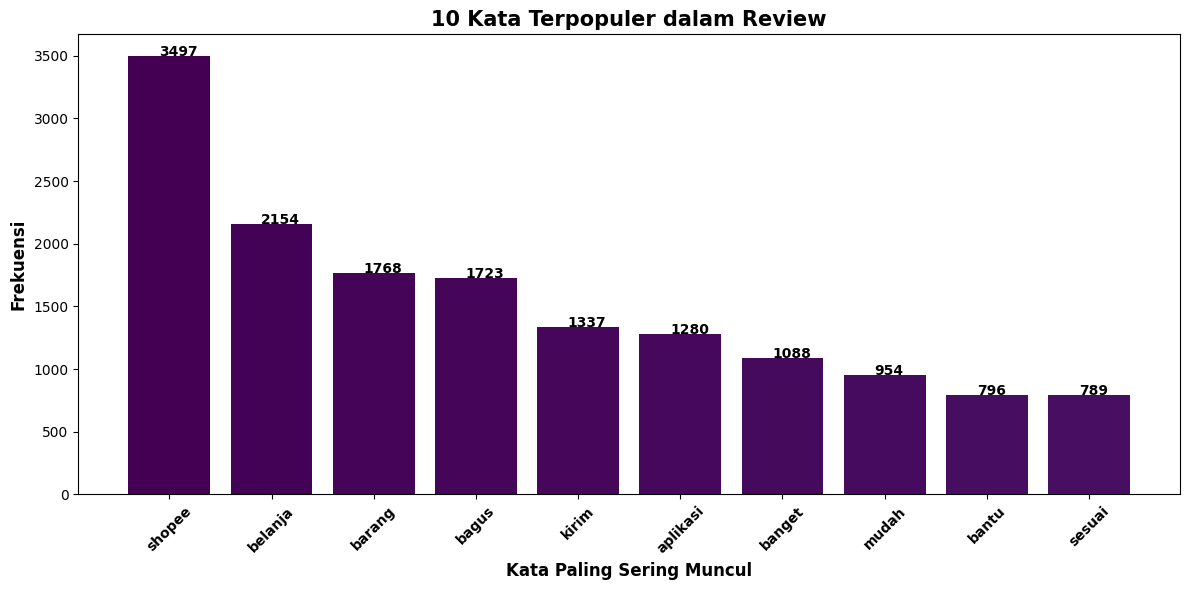

In [134]:
from collections import Counter
import matplotlib.pyplot as plt

# Ambil teks gabungan dari dataframe
teks_korpus = " ".join(df['final_text'])

# Tokenisasi dan filter stopword
def hitung_kata_terbanyak(teks, daftar_stopword, n=10):
    """
    Menghitung n kata terbanyak dari teks setelah menghapus stopword.
    
    Parameters:
        teks (str): Kalimat atau dokumen lengkap
        daftar_stopword (set): Kata-kata yang ingin diabaikan
        n (int): Jumlah kata teratas yang ingin ditampilkan
    
    Returns:
        list of tuple: Kata dan jumlah kemunculannya
    """
    token = teks.split()
    bersih = [t for t in token if t.lower() not in daftar_stopword and t.lower() != 'ya']
    return Counter(bersih).most_common(n)

# Hitung frekuensi 10 kata paling sering muncul
kata_teratas = hitung_kata_terbanyak(teks_korpus, stopword_total, n=10)

# Pisahkan kata dan frekuensinya untuk visualisasi
kata, jumlah = zip(*kata_teratas)

# Plot hasil dalam bentuk bar chart
warna = plt.cm.viridis(range(len(kata)))

plt.figure(figsize=(12, 6))
bars = plt.bar(kata, jumlah, color=warna)
plt.xlabel("Kata Paling Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Frekuensi", fontsize=12, fontweight='bold')
plt.title("10 Kata Terpopuler dalam Review", fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, fontweight='bold')

# Tambahkan label angka di atas setiap batang
for bar, nilai in zip(bars, jumlah):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.5, nilai, 
             fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11791 entries, 0 to 15998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              11791 non-null  object
 1   userName          11791 non-null  object
 2   Rating            11791 non-null  int64 
 3   Review Text       11791 non-null  object
 4   cleaning          11791 non-null  object
 5   case_folding      11791 non-null  object
 6   normalisasi       11791 non-null  object
 7   tokenize          11791 non-null  object
 8   stopword_removal  11791 non-null  object
 9   stemming          11791 non-null  object
 10  final_text        11791 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [138]:
df.to_csv('dataset/dataset-shopee.csv', index=False)